In [9]:
import pandas as pd

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
path = "/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/computing scores/Qasper 8-70b/qasper_70b_100.csv"
df = pd.read_csv(path)

In [12]:
df

,question,correct_answer,context,answer_70b,Rouge1,Rouge2,RougeL,Bleu,Chrf,Chrfplus,...,Bart,BEM,Prometheus,Consistency,TSim,Faithfullness,Relevancy,Correctness,RSim,LLM
0,What is the seed lexicon?,A vocabulary of positive and negative predicat...,The seed lexicon consists of positive and nega...,Positive and negative predicates.,0.315789,0.222222,0.315789,9.147827,66.257850,60.437027,...,0.158357,0.474707,3,1.0,1.0,1.0,0.967283,0.724865,0.899498,0.8
1,What are the results?,Using all data to train: AL -- BiGRU achieved ...,FLOAT SELECTED: Table 3: Performance of variou...,Tables 3 and 4.,0.000000,0.000000,0.000000,0.259022,2.191987,2.099373,...,0.020035,0.088408,1,1.0,0.0,1.0,0.801184,0.554433,0.717730,0.9
2,How are relations used to propagate polarity?,"Based on the relation between events, the sugg...","In this paper, we propose a simple and effecti...",Through Cause and Concession discourse relations.,0.000000,0.000000,0.000000,1.646664,23.606881,18.949914,...,0.001193,0.067623,3,1.0,2.0,1.0,0.891433,0.699730,0.798922,0.8
3,How are relations used to propagate polarity?,Cause relation: both events in the relation sh...,"In this paper, we propose a simple and effecti...",Through Cause and Concession discourse relations.,0.100000,0.000000,0.100000,1.958225,36.335592,29.724991,...,0.015290,0.843478,3,1.0,2.0,1.0,0.891292,0.815111,0.860443,0.8
4,How big is the Japanese data?,7000000 pairs of events were extracted from th...,"As a raw corpus, we used a Japanese web corpus...",100 million sentences.,0.000000,0.000000,0.000000,1.646664,11.711215,10.386993,...,0.007404,0.050920,1,1.0,1.0,0.0,0.759328,0.200358,0.801434,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,What is task success rate achieved?,96-97.6% using the objects color or shape and ...,"To test our model, we generated 500 new scenar...",97.6%,0.153846,0.000000,0.153846,4.573914,22.176773,19.299187,...,0.049249,0.283546,4,1.0,1.0,1.0,0.843486,0.714577,0.858308,0.0
96,How is performance of this system measured?,Using the BLEU score as a quantitative metric ...,We use the BLEU BIBREF30 metric on the validat...,"BLEU for VQG, human evaluation for chatbot.",0.421053,0.222222,0.421053,12.011055,46.031818,43.594471,...,0.004273,0.304878,4,1.0,4.0,1.0,0.816173,0.719448,0.877793,0.8
97,How big dataset is used for training this system?,"For the question generation model 15,000 image...","We use MS COCO, Bing and Flickr datasets from ...","75,000 questions and 467,777 utterances.",0.260870,0.090909,0.260870,3.916450,44.759422,40.411268,...,0.050512,0.416088,4,0.5,2.0,0.5,0.858350,0.825087,0.900349,0.9
98,How do they obtain word lattices from words?,By considering words as vertices and generatin...,"Word Lattice\nAs shown in Figure FIGREF4 , a w...",Treating substrings as vertexes and connecting...,0.333333,0.000000,0.250000,3.657016,45.666940,39.458580,...,0.023622,0.111231,3,1.0,3.0,1.0,0.898403,0.720989,0.883997,0.8


In [13]:
df.columns

Index(['question', 'correct_answer', 'context', 'answer_70b', 'Rouge1',
       'Rouge2', 'RougeL', 'Bleu', 'Chrf', 'Chrfplus', 'Meteor', 'Ter', 'Bert',
       'WMS', 'SMS', 'Wisdm', 'Bleurt', 'Bart', 'BEM', 'Prometheus',
       'Consistency', 'TSim', 'Faithfullness', 'Relevancy', 'Correctness',
       'RSim', 'LLM'],
      dtype='object')

In [14]:
columns_of_interest = ['Rouge1',
       'Rouge2', 'RougeL', 'Bleu', 'Chrf', 'Chrfplus', 'Meteor', 'Ter', 'Bert',
       'WMS', 'SMS', 'Wisdm', 'Bleurt', 'BEM', 'Bart', 'Prometheus',
       'Faithfullness', 'Relevancy', 'Correctness', 'RSim', 'Consistency',
       'TSim', 'LLM']
selected_columns_df = df[columns_of_interest]
pearson_correlation_matrix = selected_columns_df.corr()
spearman_correlation_matrix = selected_columns_df.corr(method='spearman')

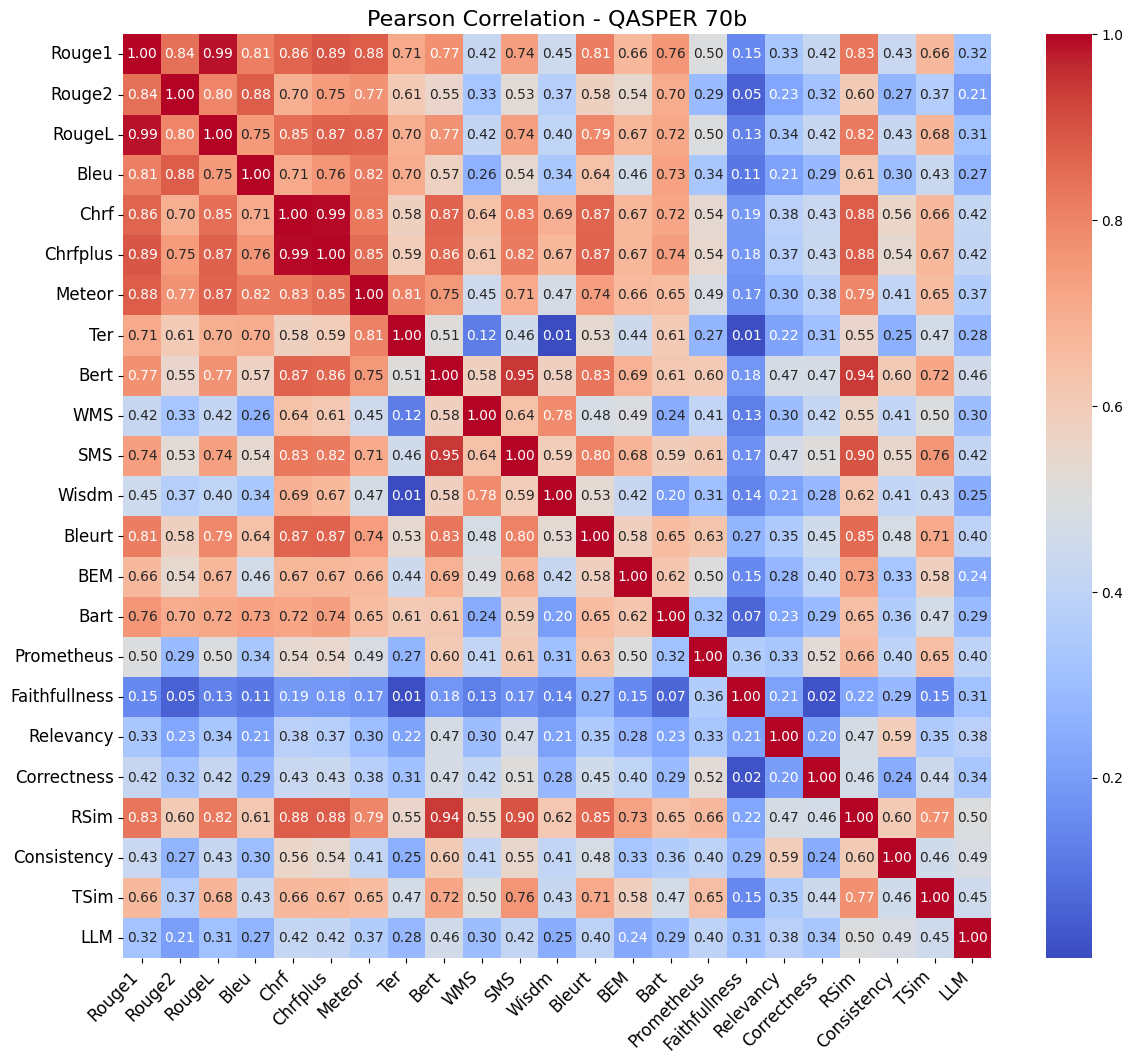

In [15]:
plt.figure(figsize=(14, 12))  # Increase the figure size

sns.heatmap(pearson_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 10},  # Adjust the font size of the annotations
            xticklabels=pearson_correlation_matrix.columns,
            yticklabels=pearson_correlation_matrix.columns)

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)  # Set y-axis labels font size

plt.title('Pearson Correlation - QASPER 70b', fontsize=16)  # Adjust title size
plt.show()

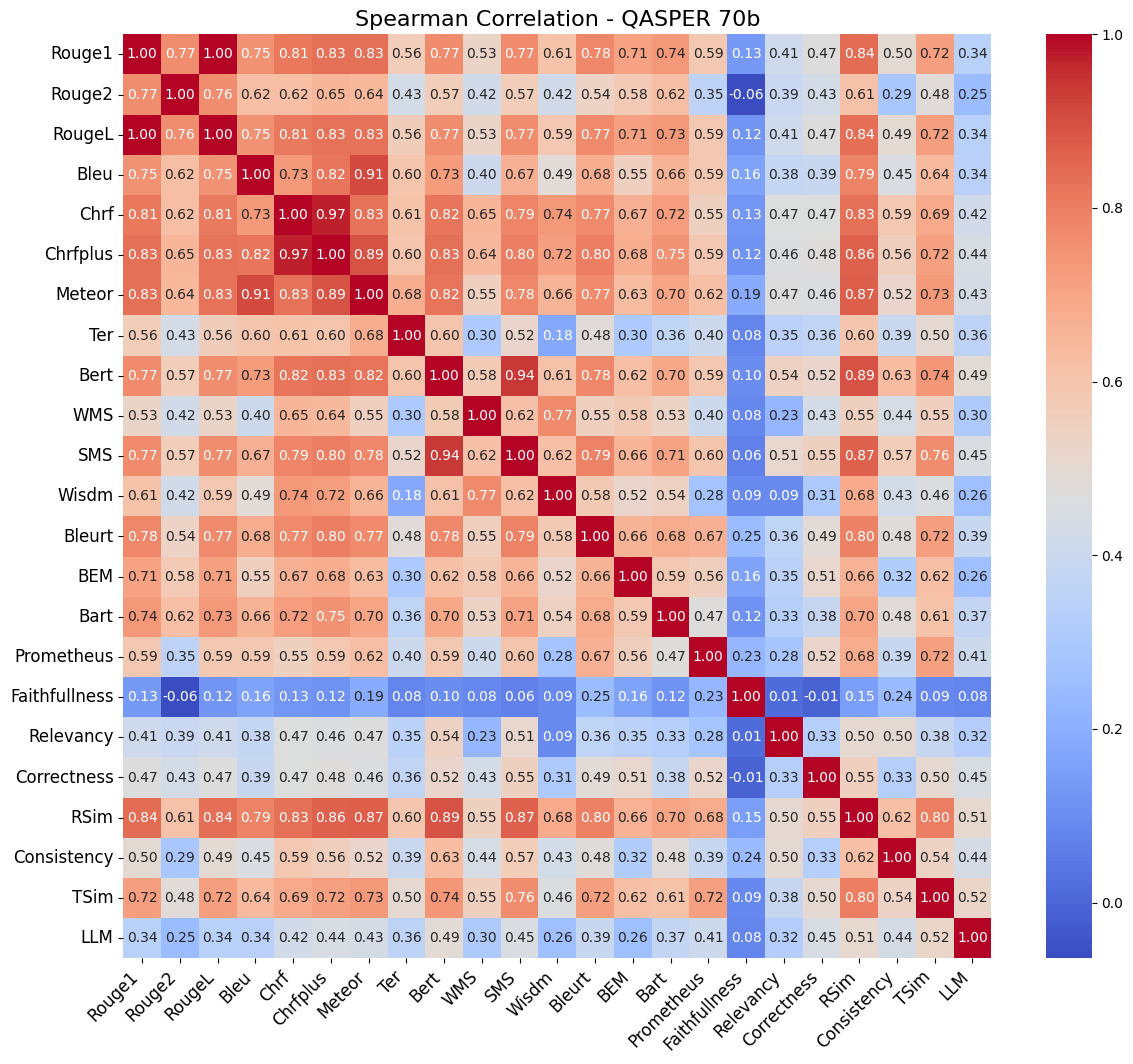

In [16]:
plt.figure(figsize=(14, 12))  # Increase the figure size

sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 10},  # Adjust the font size of the annotations
            xticklabels=pearson_correlation_matrix.columns,
            yticklabels=pearson_correlation_matrix.columns)

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)  # Set y-axis labels font size

plt.title('Spearman Correlation - QASPER 70b', fontsize=16)  # Adjust title size
plt.show()